### Multi-Class Sentiment Analysis

Sentiment classifiers are used for binary classification (just positive or negative sentiment), and for good reason: Multi-class sentiment classification is a **_significantly_** **_more challenging_** task. A fine-grained sentiment can uses up to _five_ discrete classes. As one might imagine, models very easily err on either side of the strong/weak sentiment.

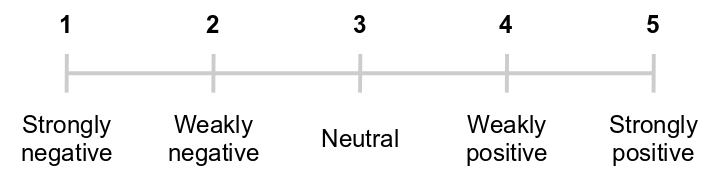



**Sentiment Analysis – tripadvisor Ratings**

In [1]:
import pandas as pd

df = pd.read_csv('tripadvisor.csv')
df.head()

df.shape

(20491, 2)

In [6]:
# Classify the movies based on the rating

def create_sentiment(rating):
    if rating == 1 or rating == 2:
        return -1  # negative sentiment
    elif rating == 4 or rating == 5:
        return 1  # positive sentiment
    else:
        return 0  # neutral sentiment


df['Sentiment'] = df['Rating'].apply(create_sentiment)

df.head()

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,-1
2,nice rooms not 4* experience hotel monaco seat...,3,0
3,"unique, great stay, wonderful time hotel monac...",5,1
4,"great stay great stay, went seahawk game aweso...",5,1


In [9]:
df['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [11]:
from sklearn.feature_extraction.text import re


def clean_data(review):
    no_punc = re.sub(r'[^\w\s]', '', review)
    no_digits = ''.join([i for i in no_punc if not i.isdigit()])

    return no_digits

In [13]:
df['Review'] = df['Review'].apply(clean_data)
df['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed nonexistent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy neighbors aveda bath products nice did not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay  parking night  '

In [21]:
# TF-IDF Transformation
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    strip_accents=None,
    lowercase=False,
    preprocessor=None
)

X = tfidf.fit_transform(df['Review'])

In [25]:
from sklearn.model_selection import train_test_split

y = df['Sentiment']  # target variable

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)  # fit the model
preds = model.predict(X_test)  # make predictions

In [38]:
from sklearn.metrics import accuracy_score

accuracy_score(preds, y_test)

0.8477454616435682

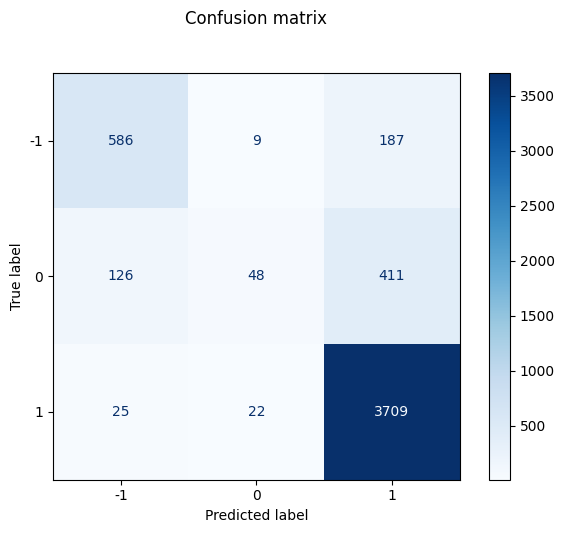

In [51]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(
    values_format='d',
    cmap='Blues'
)
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.show()


In [53]:
# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[ 586    9  187]
 [ 126   48  411]
 [  25   22 3709]]
              precision    recall  f1-score   support

          -1       0.80      0.75      0.77       782
           0       0.61      0.08      0.14       585
           1       0.86      0.99      0.92      3756

    accuracy                           0.85      5123
   macro avg       0.75      0.61      0.61      5123
weighted avg       0.82      0.85      0.81      5123

